<a href="https://colab.research.google.com/github/AnJoGar/Prediccion_enfermedad_cardiaca_Proyecto/blob/main/Prediccion_enfermedad_cardiaca_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto: Predicción de probabilidad de padecimiento de enfermedad cardiovascular**
Objetivo: Desarrollar un modelo predictivo de aprendizaje automático para identificar la presencia de enfermedad cardíaca utilizando características de salud y estilo de vida.


# ▶ **Pasos implementado en el proyecto :**

---

* ✔ Observar nuestros datos, explorarlos
* ✔ Limpieza y manejo de datos
* ✔ Análisis exploratorio de datos
* ✔ Modelado


# ▶   **1 :  Exploración de datos**

### **1.1 : Importación de librerias**
El código comienza importando las librerías necesarias para el análisis de datos, visualización, preprocesamiento, modelado, y evaluación de modelos de aprendizaje automático.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import scipy
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from joblib import dump, load
import matplotlib.pyplot as plt

**Librerias para el arbol de desición**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar el archivo CSV con el delimitador ","
df = pd.read_csv('https://raw.githubusercontent.com/AnJoGar/Proyecto_Data_Cardiovascular/main/heart_2020_cleaned.csv', sep = "," , encoding = 'utf-8')

In [ ]:
print(df.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

### **1.2 : Exploración de data**

In [ ]:
# Mostrar las primeras filas del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
# Mostrar información general del dataframe
print(df.columns)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


# ▶ **2 : Limpieza de datos**

Preparar los datos para su análisis y modelado, asegurando que sean precisos, consistentes y completos.




### **2.1 : Descubrimiento de datos faltantes**

In [ ]:
# Verificar si hay valores nulos en el dataframe
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


### **2.2 : Eliminación de datos duplicados y valores atípicos**

In [ ]:
# Verificar si hay filas duplicadas
df.duplicated().sum()

18078

In [ ]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

,0
BMI,"Axes(0.125,0.11;0.168478x0.77)"
PhysicalHealth,"Axes(0.327174,0.11;0.168478x0.77)"
MentalHealth,"Axes(0.529348,0.11;0.168478x0.77)"
SleepTime,"Axes(0.731522,0.11;0.168478x0.77)"


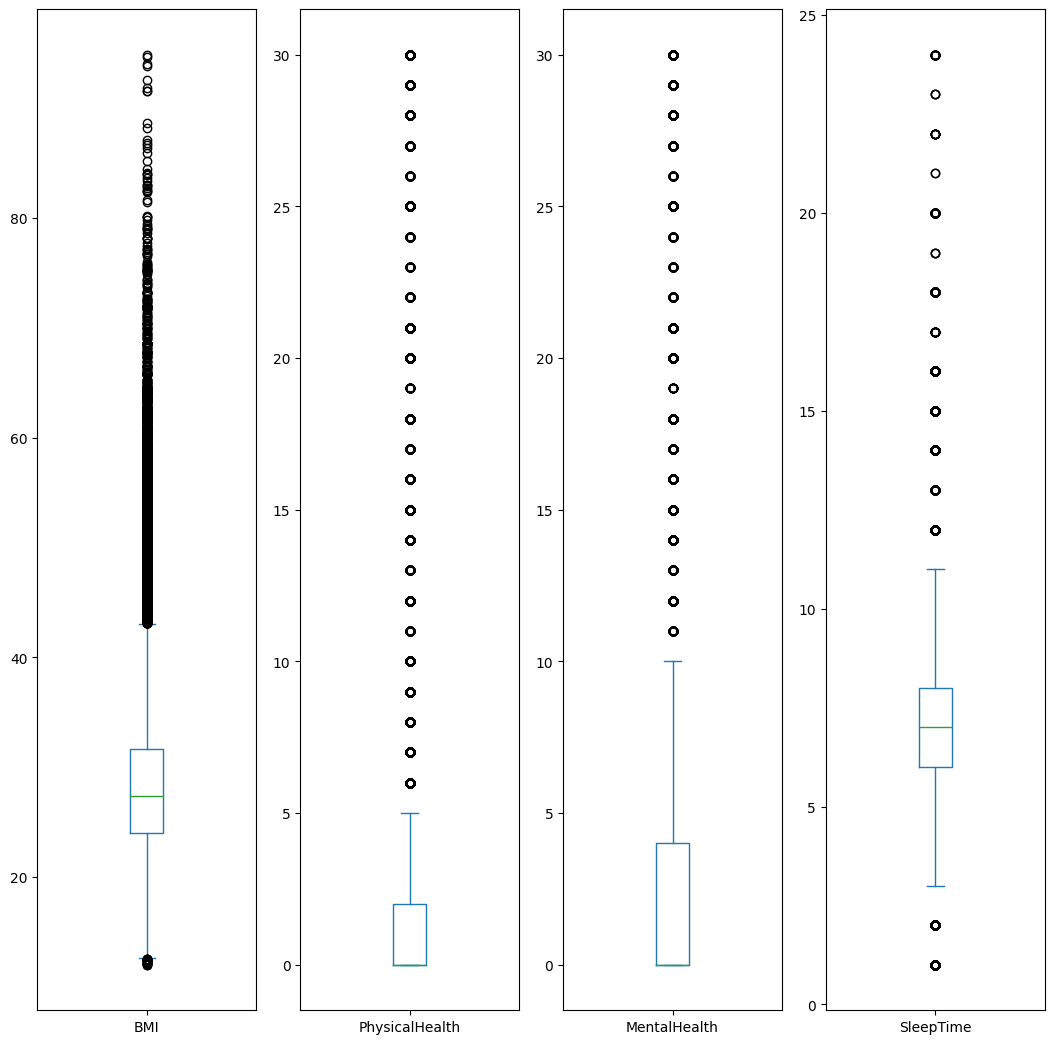

In [ ]:
#Detectar outliers usando gráficos de caja (box plots)
#Esto genera gráficos de caja (box plots) para cada columna numérica del
#DataFrame df. Los gráficos de caja muestran la distribución de los datos,
#incluyendo la mediana, los cuartiles, y los valores atípicos.
#Esto permite detectar y visualizar valores anómalos y entender
#la dispersión y centralidad de los datos en cada columna.
df.plot(kind = "box" , subplots = True , figsize = (13,13) )

# ▶ **3 : Análisis exploratorio de datos**

**Gráfico Circular de Distribución de Género**

<Axes: ylabel='count'>

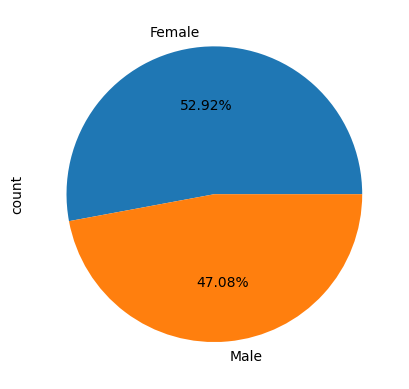

In [ ]:
# Crear un gráfico de pastel para visualizar la distribución de género
round(df['Sex'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = "%1.2f%%")

* 0 - Femenino
* 1 - Masculino

**Gráfico Sunburst de Distribución de Enfermedad Cardíaca por Género**

In [ ]:
# Crear un gráfico Sunburst para visualizar la relación entre enfermedad cardíaca y género
fig = px.sunburst(df, path=['HeartDisease','Sex']).update_traces(textinfo='label+percent parent')
fig.show()

**Gráfico Sunburst de Distribución de Enfermedad Cardíaca por Actividad Física**

In [ ]:
# Crear un gráfico Sunburst para visualizar la relación entre enfermedad cardíaca y actividad física
fig = px.sunburst(df, path=['HeartDisease','PhysicalActivity']).update_traces(textinfo='label+percent parent')
fig.show()

# ▶ **4 : Modelado**
Construir, entrenar, y evaluar modelos de aprendizaje automático para predecir o clasificar los datos.

**Variables de entrada**

HeartDisease:

* Descripción: Indica si la persona tiene enfermedad cardíaca.

* Valores: 0 (No) o 1 (Sí).

BMI (Índice de Masa Corporal):

* Descripción: Medida del peso corporal en relación con la altura de la persona. Se calcula como el peso en kilogramos dividido por la altura en metros cuadrados.

* Valores: Numéricos (pueden variar ampliamente).

Smoking:

* Descripción: Indica el nivel de consumo de tabaco.

* Valores: Generalmente 0 (No fumador) y 1 (Fumador). El valor 2 podría ser una categoría adicional como "Ex-fumador" o "Fumador ocasional".

AlcoholDrinking:

* Descripción: Indica si la persona consume alcohol.

* Valores: 0 (No) o 1 (Sí).

Stroke:

* Descripción: Indica si la persona ha tenido un derrame cerebral (accidente cerebrovascular).

* Valores: 0 (No) o 1 (Sí).

PhysicalHealth:

* Descripción: Número de días en el último mes en que la salud física de la persona se consideró mala.

* Valores: Numéricos (0 y mayores).

MentalHealth:

* Descripción: Número de días en el último mes en que la salud mental de la persona se consideró mala.

* Valores: Numéricos (0 y mayores).

DiffWalking:

* Descripción: Indica si la persona tiene dificultades para caminar.

* Valores: 0 (No) o 1 (Sí).

Sex:

* Descripción: Sexo de la persona.

* Valores: 0 (Femenino) y 1 (Masculino).

AgeCategory:

* Descripción: Categoría de edad de la persona. Esto podría ser una codificación de rangos de edad.

* Valores: Generalmente numéricos que representan diferentes rangos de edad.

Race:

* Descripción: Raza o etnicidad de la persona.

* Valores: Codificación numérica para diferentes categorías raciales o étnicas.

Diabetic:

* Descripción: Indica si la persona tiene diabetes.

* Valores: 0 (No) o 1 (Sí).

PhysicalActivity:

* Descripción: Indica si la persona realiza actividad física regular.

* Valores: 0 (No) o 1 (Sí).

GenHealth:

* Descripción: Autoevaluación de la salud general.

* Valores: Generalmente numéricos en una escala (por ejemplo, 1 a 5).

SleepTime:

* Descripción: Promedio de horas de sueño por noche.

* Valores: Numéricos (horas de sueño).

Asthma:

* Descripción: Indica si la persona tiene asma.

* Valores: 0 (No) o 1 (Sí).

KidneyDisease:

* Descripción: Indica si la persona tiene enfermedad renal.

* Valores: 0 (No) o 1 (Sí).

SkinCancer:

* Descripción: Indica si la persona tiene cáncer de piel.

* Valores: 0 (No) o 1 (Sí).

**Variables de salida**
* HeartDisease: probabilidad de que una persona tenga una enfermedad cardíaca dado un conjunto de características.

In [ ]:
#Variables codificadas para tratarlas como números
# Lista de columnas categóricas
categorical_columns = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
    'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
    'Asthma', 'KidneyDisease', 'SkinCancer'
]

# Codificar variables categóricas
label_encoders = {}
for column in categorical_columns:
    if df[column].dtype == 'object':  # Verifica si la columna es de tipo objeto
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Mostrar la codificación de variables categóricas después de la transformación
print("Después de la codificación:")
print(df.head())

Después de la codificación:
   HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             0  16.60        1                0       0             3.0   
1             0  20.34        0                0       1             0.0   
2             0  26.58        1                0       0            20.0   
3             0  24.21        0                0       0             0.0   
4             0  23.71        0                0       0            28.0   

   MentalHealth  DiffWalking  Sex  AgeCategory  Race  Diabetic  \
0          30.0            0    0            7     5         2   
1           0.0            0    0           12     5         0   
2          30.0            0    1            9     5         2   
3           0.0            0    0           11     5         0   
4           0.0            1    0            4     5         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          4        5

### **4.1 : Arbol de decisión**

Test Accuracy (Decision Tree): 0.8530922709797163
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     54894
           1       0.22      0.24      0.23      5450

    accuracy                           0.85     60344
   macro avg       0.57      0.58      0.57     60344
weighted avg       0.86      0.85      0.86     60344



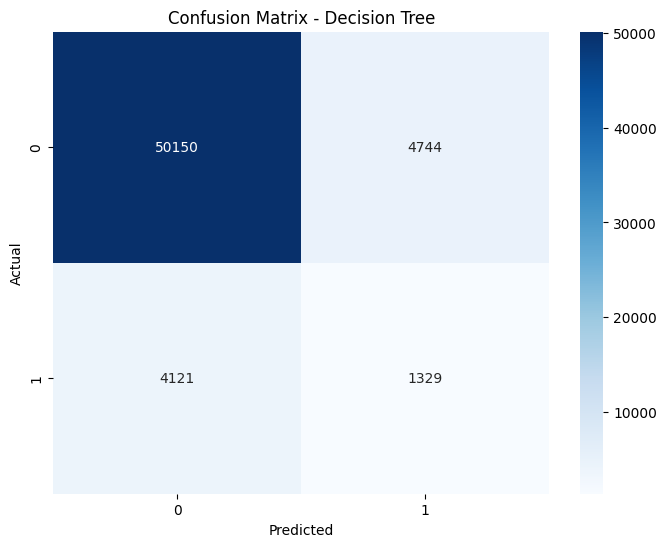

In [ ]:
# Implementación del Árbol de Decisión

# Convertir variables categóricas a valores numéricos usando LabelEncoder
lst = list(df.select_dtypes("object").columns)
lst
for i in lst:
    lb = LabelEncoder()
    df[i] = lb.fit_transform(df[i])

# Separar características (X) y etiqueta (y)
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_tree = tree_model.predict(X_test_scaled)

# Calcular la precisión del árbol de decisión
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print(f'Test Accuracy (Decision Tree): {tree_accuracy}')
print(classification_report(y_test, y_pred_tree))

# Graficar la matriz de confusión para el árbol de decisión
conf_matrix = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()



### **4.2 : ANN (Red neuronal artificial)**

**Modelo de red neuronal artifical 1**

In [ ]:
# Convertir variables categóricas a valores numéricos usando LabelEncoder
lst = list(df.select_dtypes("object").columns)
lst

[]

In [ ]:

for i in lst:
    lb = LabelEncoder()
    df[i] = lb.fit_transform(df[i])

In [ ]:
# Separar características (X) y etiqueta (y)
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalizar características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
X_train.shape

(241373, 17)

In [ ]:
# Construir un modelo de red neuronal avanzada
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compilar el modelo con el optimizador Adam y la función de pérdida binary_crossentropy
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Definir un callback para detener el entrenamiento temprano si no hay mejoras
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [ ]:
# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=15, batch_size=64,
                    validation_split=0.2, callbacks=[early_stopping])

Epoch 1/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8280 - loss: 0.4244 - val_accuracy: 0.9089 - val_loss: 0.2443
Epoch 2/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9086 - loss: 0.2535 - val_accuracy: 0.9096 - val_loss: 0.2413
Epoch 3/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9098 - loss: 0.2471 - val_accuracy: 0.9100 - val_loss: 0.2413
Epoch 4/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9099 - loss: 0.2456 - val_accuracy: 0.9090 - val_loss: 0.2413
Epoch 5/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9098 - loss: 0.2442 - val_accuracy: 0.9099 - val_loss: 0.2396
Epoch 6/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9111 - loss: 0.2417 - val_accuracy: 0.9100 - val_loss: 0.2395
Epoch 7/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9094 - loss: 0.2439 - val_accuracy: 0.9098 - val_loss: 0.2394
Epoch 8/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9109 - loss: 0.

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')

1886/1886 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - accuracy: 0.9115 - loss: 0.2376
Test Accuracy: 0.9105958938598633


**Gráficos de Precisión del Modelo (Training History)**

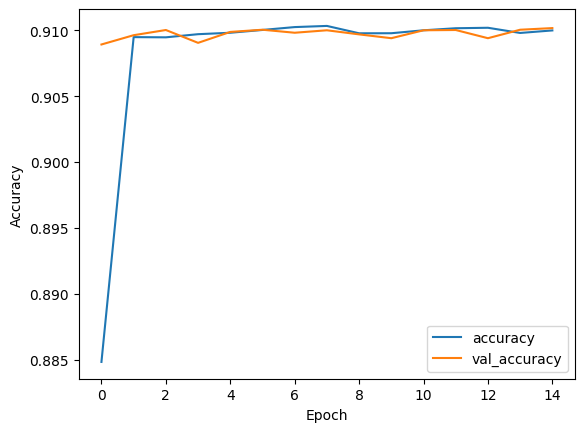

In [ ]:
# Graficar la historia de entrenamiento para precisión
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

**Modelo de red neuronal artifical 2**


In [ ]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

In [ ]:
# Separar características (X) y etiqueta (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
# Construir un modelo de red neuronal con una estructura diferente
model2 = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X_train.shape[1]]),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(265, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compilar el modelo con el optimizador Adam y la función de pérdida binary_crossentropy
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Definir un callback para detener el entrenamiento temprano si no hay mejoras
early_stopping1 = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [ ]:
# Entrenar el modelo
history = model2.fit(X_train_scaled, y_train, epochs=15, batch_size=64,
                    validation_split=0.2, callbacks=[early_stopping1])

Epoch 1/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8661 - loss: 0.3357 - val_accuracy: 0.9101 - val_loss: 0.2408
Epoch 2/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9098 - loss: 0.2459 - val_accuracy: 0.9099 - val_loss: 0.2429
Epoch 3/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9105 - loss: 0.2420 - val_accuracy: 0.9098 - val_loss: 0.2406
Epoch 4/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9099 - loss: 0.2426 - val_accuracy: 0.9096 - val_loss: 0.2404
Epoch 5/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9106 - loss: 0.2390 - val_accuracy: 0.9105 - val_loss: 0.2396
Epoch 6/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9107 - loss: 0.2385 - val_accuracy: 0.9103 - val_loss: 0.2380
Epoch 7/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.9107 - loss: 0.2388 - val_accuracy: 0.9102 - val_loss: 0.2387
Epoch 8/15
3018/3018 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9110 - loss: 0

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy2 = model2.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy2}')

1886/1886 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9113 - loss: 0.2372
Test Accuracy: 0.9108113646507263


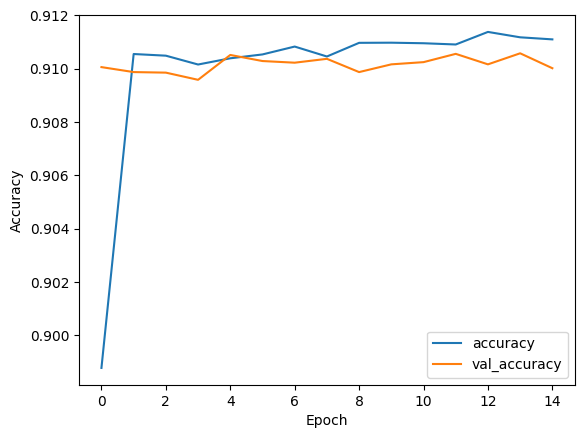

In [ ]:
# Graficar la historia de entrenamiento para precisión
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

**Comparación del arbol de decisión y la red neuronal artificial**

In [ ]:
import seaborn as sns

# Precisión del árbol de decisión
print("Árbol de Decisión:")
print(f'Test Accuracy (Decision Tree): {tree_accuracy}')
print(classification_report(y_test, y_pred_tree))

# Precisión del primer modelo ANN
print("Primer Modelo ANN:")
print(f'Test Accuracy (ANN Model 1): {test_accuracy}')

# Precisión del segundo modelo ANN
print("Segundo Modelo ANN:")
print(f'Test Accuracy (ANN Model 2): {test_accuracy2}')



Árbol de Decisión:
Test Accuracy (Decision Tree): 0.8530922709797163
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     54894
           1       0.22      0.24      0.23      5450

    accuracy                           0.85     60344
   macro avg       0.57      0.58      0.57     60344
weighted avg       0.86      0.85      0.86     60344

Primer Modelo ANN:
Test Accuracy (ANN Model 1): 0.9105958938598633
Segundo Modelo ANN:
Test Accuracy (ANN Model 2): 0.9108113646507263


In [ ]:

# Comparar las precisiones
if test_accuracy > tree_accuracy:
    print("La red neuronal tiene una mayor precisión que el arbol de decisión.")
else:
    print("El árbol de decisión tiene una mayor precisión.")

    # Comparar las precisiones de las redes neuronales
if test_accuracy > test_accuracy2:
    print("La red neuronal 1 tiene una mayor precisión.")
else:
    print("La red neuronal 2 tiene una mayor precisión.")

La red neuronal tiene una mayor precisión que el arbol de decisión.
La red neuronal 2 tiene una mayor precisión.


In [ ]:
#Se procede a guardar el modelo 2 que tiene mas presición
model2.save('modelo_cardiovascular.h5')

**Predicción utilizando el modelo de red neuronal artificial 2 debido a su alta precisión**

**Prediccion de enfermedad cardiovasular**

In [ ]:

# Ejemplo de nueva entrada
Luca_Modric = {
     'BMI': 20.0,
    'Smoking': 1,
    'AlcoholDrinking': 0,
    'Stroke': 0,
    'PhysicalHealth': 3.0,
    'MentalHealth': 0.0,
    'DiffWalking': 0,
    'Sex': 1,
    'AgeCategory': 7,
    'Race': 3,
    'Diabetic': 1,
    'PhysicalActivity': 1,
    'GenHealth': 3,
    'SleepTime': 8.0,
    'Asthma': 0,
    'KidneyDisease': 0,
    'SkinCancer': 1
}

# Convertir el diccionario a DataFrame
nueva_persona_df = pd.DataFrame([Luca_Modric])

# Preprocesar los datos de la misma manera que el conjunto de entrenamiento
nueva_persona_scaled = scaler.transform(nueva_persona_df)

# Realizar la predicción
prediccion = model2.predict(nueva_persona_scaled)
probabilidad = prediccion[0][0] * 100
print(f'Predicción para la persona específica:{prediccion}')
print(f'Probabilidad de que la persona tenga la enfermedad cardíaca: {probabilidad:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicción para la persona específica:[[0.07013701]]
Probabilidad de que la persona tenga la enfermedad cardíaca: 7.01%


**Prediccion de enfermedad cardiovasular utilizando el modelo entrenado "modelo_cardiovascular.h5"**

In [ ]:
# Cargar el modelo guardado
model2 = keras.models.load_model('modelo_cardiovascular.h5')

# Recompilar el modelo especificando las métricas nuevamente
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Definir una nueva entrada
Luca_Modric = {
    'BMI': 20.0,
    'Smoking': 1,
    'AlcoholDrinking': 0,
    'Stroke': 0,
    'PhysicalHealth': 3.0,
    'MentalHealth': 0.0,
    'DiffWalking': 0,
    'Sex': 1,
    'AgeCategory': 7,
    'Race': 3,
    'Diabetic': 1,
    'PhysicalActivity': 1,
    'GenHealth': 3,
    'SleepTime': 8.0,
    'Asthma': 0,
    'KidneyDisease': 0,
    'SkinCancer': 1
}

# Convertir el diccionario a DataFrame
nueva_persona_df = pd.DataFrame([Luca_Modric])

# Cargar el scaler
scaler = load('scaler.pkl')

# Normalizar características numéricas usando el scaler ya ajustado
nueva_persona_scaled = scaler.transform(nueva_persona_df)

# Realizar la predicción con el modelo cargado
prediccion = model2.predict(nueva_persona_scaled)
probabilidad = prediccion[0][0] * 100
print(f'Predicción para la persona específica: {prediccion[0][0]}')
print(f'Probabilidad de que la persona tenga la enfermedad cardíaca: {probabilidad:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicción para la persona específica: 0.07013700902462006
Probabilidad de que la persona tenga la enfermedad cardíaca: 7.01%


# ▶ **Conclusión del proyecto*

Nuestro proyecto de aprendizaje profundo sobre el conjunto de datos de enfermedades cardiovasculares tiene como objetivo predecir la presencia o ausencia de enfermedades cardiovasculares en pacientes. El conjunto de datos constaba de 319.795 registros de datos de pacientes con 11 características, incluidas características objetivas, de examen y subjetivas. Utilizamos tres arquitecturas diferentes para nuestros modelos de aprendizaje profundo, logrando una precisión máxima de alrededor del 91% en ambos modelos de red neuronal artificial (ANN). Además, implementamos un modelo de árbol de decisión, cuyo rendimiento mostró una precisión de aproximadamente 85.3%. Los resultados detallados para el árbol de decisión incluyen una precisión de 92% para la clase 0 (sin enfermedad) y 22% para la clase 1 (con enfermedad), con un f1-score de 0.23 para la clase 1, lo que indica un rendimiento limitado en la predicción de la presencia de enfermedad cardiovascular.  Estos resultados sugieren que los modelos de red neuronal pueden haber alcanzado su máximo potencial predictivo con el conjunto de características dado, mientras que el modelo de árbol de decisión presenta limitaciones en la detección de casos positivos.